<h1><center>Iris Flowering Plant Dataset</center></h1> 

## Hypothesis:
None

In [1]:
## Import Possibly needed Libraries
import numpy as np # use for varray operations
import pandas as pd # Use for Ddtaframe operations
import seaborn as sb # Use for visualization
import matplotlib.pyplot as mp
%matplotlib inline 
#allow plots to be made inside notebooks

## Data Aquistion

Viewing the first 10 rows of the Iris Dataset

In [2]:
#Importing data into Jupyter Notebook
location = r"C:\Users\Latoya Clarke\Desktop\Data for Analysis\iris.data.txt"
iris = pd.read_csv(location, sep=",", names = ["sepal_length","sepal_width", "petal_length", "petal_width","species"])

# looking at the first 10 records
iris.loc[:9]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Exploration

Looking at a general summary of the dataset:

In [3]:
# Viewing general information on dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


This shows in total 5 columns, 150 entries/rows and datatypes of each columns. There are no missing values since all attribute of the iris (eg. sepal_width) are equal (150 each).

Now, looking at the statistical summaries of the data:

In [4]:
# Show the statistics of all numeric fields
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The Standard Deviations showed a very small excepting the petal lengths which can vary in a range 5.9. The average sepal width is similar to the average petal length in cm. Sepal width shows similar mean and medians so this is seemly a symmetrical distribution.

Finding the mode of each field of the dataset:

In [5]:
# Finding the mode for each field
iris_mode = iris.set_index('species') # Use species as index
iris_mode.mode()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.0,1.5,0.2


The sepal width shows that the mode is also 3, similar to the mean and median above, so this distribution will be symmetrical.
For Sepal length, the mode, mean and median are similar as well thus should show a somewhat symmetrical distribution. The most recurrent petal length is 1.5cm however 25% of the petal lengths are >=1.6cm  

Looking at the distribution of all the sepal and petal dimensions via boxplot:

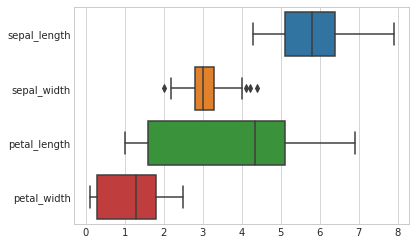

In [6]:
#Visualize the data via box plot
with sb.axes_style('whitegrid'):
    sb.boxplot(data=iris, orient="h");

The distribution of the petal length & width showed by the plot is skewed to the right. The sepal length & width are a almost symmetrical in dstribution. Sepal width shows that there are outliers in the data that are greater than 4cm and less than 2.2cm.

Showing that Sepal length should look close to a normal distribution:

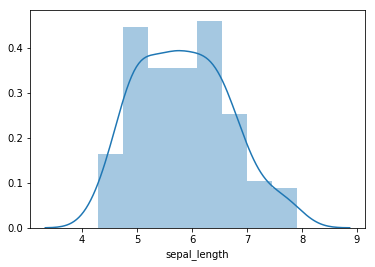

In [7]:
# Showing the plot distribtion of sepal length
sb.distplot(iris["sepal_length"])

Investigating Sepals and Petals dimensions per flower species

First, viewing the average petal width of each species of the flowering plant:

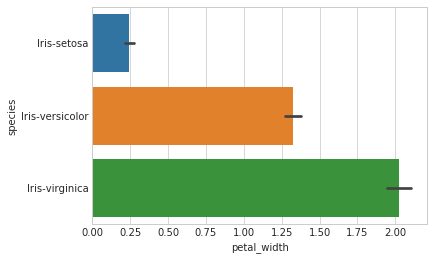

In [8]:
# Showing the average width of each species via barplot
with sb.axes_style('whitegrid'):
    sb.barplot(data=iris, y = 'species', x= 'petal_width', estimator = np.mean)

On average virginicas have the widest petals of the three with the average length being 2cm.

Secondly, Let's view the average petal length of each species of the flowering plant:

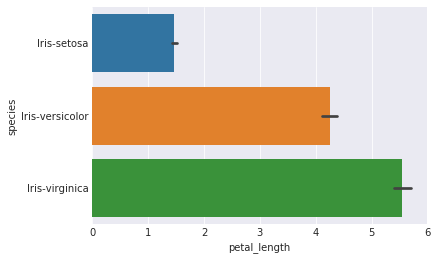

In [9]:
# Showing the Average length of each species via barplot
with sb.axes_style('darkgrid'):
    sb.barplot(data=iris, y = 'species', x= 'petal_length', estimator = np.mean)

On average Virginicas have the longest petals of the three having a value of 5.5cm. Iris-Setosa has the lowest visa 1.5cm.

Thirdly, Let's view the average sepal length of the flowering plant:

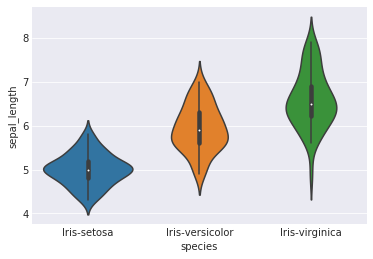

In [10]:
#Showing by different flowers by sepal width on average
with sb.axes_style('darkgrid'):
    sb.violinplot(data= iris, x='species', y='sepal_length');


On average, Virginicas have the longest sepals of 6.5cm. Setosa have a high density of points about 5cm.

Finally, viewing the average sepal width of each species of the flowering plant:

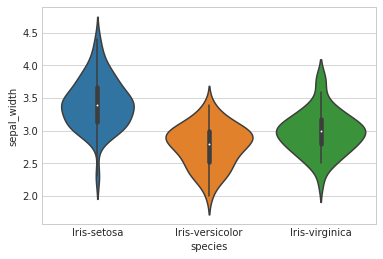

In [11]:
#Showing by different flowers by sepal width on average
with sb.axes_style('whitegrid'):
    sb.violinplot(data= iris, x='species', y='sepal_width');

On average, Setosas have the widest sepals.

Viewing the Statistical Summaries of Flower dimensions by species:

In [12]:
#This is an alternative solution
iris_new = [iris.pivot( columns ="species").count(),iris.pivot(columns ="species").mean(),iris.pivot(columns ="species").min(),iris.pivot(columns ="species").max(),iris.pivot(columns ="species").quantile(0.25),iris.pivot(columns ="species").quantile(0.5),iris.pivot(columns ="species").quantile(0.75)]
result = pd.concat(iris_new,axis =1,)
result.columns = ['count', 'mean','min','max','25%','50%', '75%']
result

count   mean  min  max    25%   50%    75%
             species                                                    
sepal_length Iris-setosa         50  5.006  4.3  5.8  4.800  5.00  5.200
             Iris-versicolor     50  5.936  4.9  7.0  5.600  5.90  6.300
             Iris-virginica      50  6.588  4.9  7.9  6.225  6.50  6.900
sepal_width  Iris-setosa         50  3.418  2.3  4.4  3.125  3.40  3.675
             Iris-versicolor     50  2.770  2.0  3.4  2.525  2.80  3.000
             Iris-virginica      50  2.974  2.2  3.8  2.800  3.00  3.175
petal_length Iris-setosa         50  1.464  1.0  1.9  1.400  1.50  1.575
             Iris-versicolor     50  4.260  3.0  5.1  4.000  4.35  4.600
             Iris-virginica      50  5.552  4.5  6.9  5.100  5.55  5.875
petal_width  Iris-setosa         50  0.244  0.1  0.6  0.200  0.20  0.300
             Iris-versicolor     50  1.326  1.0  1.8  1.200  1.30  1.500
             Iris-virginica      50  2.026  1.4  2.5  1.800  2.00  2.300

## Conclusion

- The Iris species follow an order of increasing magnitude with Iris-Setosa having the smallest dimensions, followed by Iris-Versicolor it relative larger dimensions then Iris-Virginica with the largest dimension of the flower.

Let's now look at the correlation of flowering plant dimensions by assessing two dimensions at a time with a pairplot:

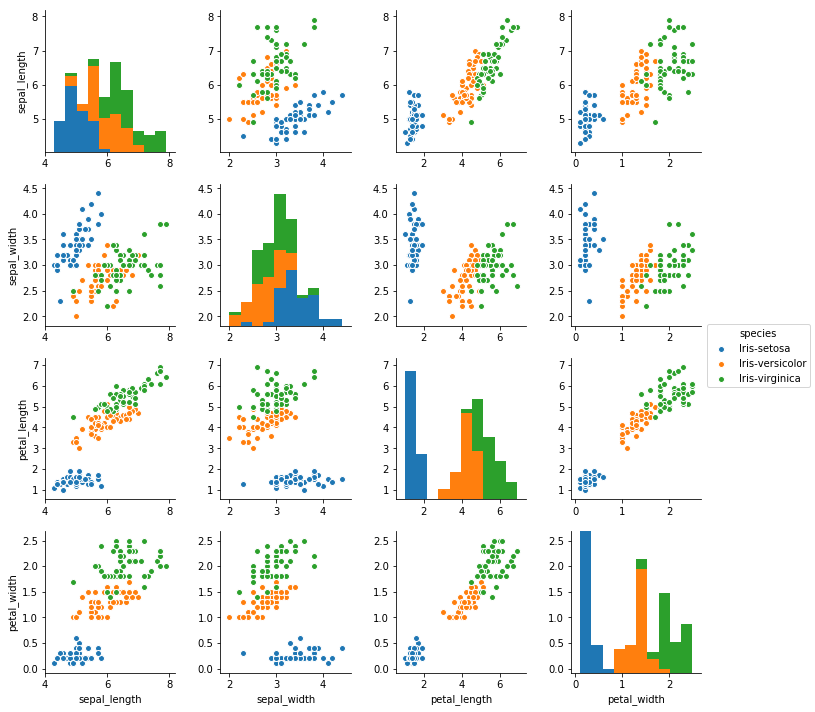

In [13]:
#Collection of graphs showing plant components by species
sb.pairplot(iris, kind = 'scatter', hue = 'species')

Looking at each  rows of plots, we see where Y-axis is petal_length (3rd row) shows the greatest distinction amongst species. A similar feature is seen with petal_width on the x-axis (4th column). We can then conclude to use the Petal length as on y axi  petal_length and Petal Width on the x-axis for the features to be used in classification.

In [14]:
#Creating labels for the dataset
y = np.array(iris.species)

#converting strings to distinct numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)

y = le.transform(y)

Converting each Species to a numeric value for prediction:
- setosa = 0
- versicolor = 1
- virginica = 2

In [15]:
#Creating features for training
iris_selected = iris.drop(['sepal_length','sepal_width','species'], axis = 1)
X= iris_selected.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(X).toarray()

In [16]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1234)

In [17]:
# importing KNN from sklearn library
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6) # default value for n_neighbors is 5

# Train the model using the training sets and check score
model.fit(X_train, y_train)

#Predict Output
predicted= model.predict(X_test)

In [18]:
# Showing accuracy of prediction 
from sklearn.metrics import accuracy_score
print("The model's accuracy of KNN: ", 100* accuracy_score(predicted, y_test),"%")

The model's accuracy of KNN:  100.0 %
